In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
#### pip install seaborn


In [16]:
path = '/Users/rohitsharma/Downloads/'              
dhs_dict_file  = path+'IAPR74DT/IAPR74FL.DO' # DHS data dictionary (use as column name)
dhs_file = path+'IAPR74DT/IAPR74FL.DTA'  # household record data
#dhs_hiv_file = path+'DHS/BUAR61FL.DTA' # HIV data
#/Users/rohitsharma/Downloads/IAPR74DT

In [17]:
def get_dhs_dict(dhs_dict_file):
    '''
    help function to read 
    '''
    dhs_dict = dict()
    with open(dhs_dict_file, 'r', errors='replace') as file:
        line = file.readline()
        while line:
            line = file.readline()
            if 'label variable' in line:
                code = line.split()[2]
                colname = ' '.join([x.strip('"') for x in line.split()[3:]])
                dhs_dict[code] = colname
    return dhs_dict


In [18]:
dhs = pd.read_stata(dhs_file, convert_categoricals=False)
dhs_dict = get_dhs_dict(dhs_dict_file)
# use dhs_dict_file as column names
dhs = dhs.rename(columns=dhs_dict).dropna(axis=1)
print('Data Dimensions: {}'.format(dhs.shape))

Data Dimensions: (2869043, 147)


In [19]:
dhs.columns.to_list()

['Case Identification',
 'Line number',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number (answering Household questionnaire)",
 'Ultimate area unit',
 'Household sample weight (6 decimals)',
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)',
 'Number of household members',
 'Number of eligible women in household',
 'Number of eligible men in household',
 'Number of de jure members',
 'Number of de facto members',
 'Number of children 5 and under (de jure)',
 'Result of household interview',
 'Day of interview',
 'Number of visits',
 'Interviewer identification',
 'Ever-married sample',
 'Primary sampling unit',
 'Sample strata for sampling errors',
 'Stratification used in sample design',
 'State',
 'Type of place of residence',
 'Household selected for male interview',
 'Household weight for male subsample (6 decimals)',
 'Field supervisor',
 'Number of eligible children for height and weight',
 'Total adults measured'

In [20]:
data_dhs = dhs[[
    'Cluster number',
    'Time to get to water source (minutes)',
    'Has electricity',
    'Has mobile telephone',
    'Wealth index factor score (5 decimals)',
    'Education in single years - current school year']]

In [21]:
data_dhs.isnull().sum()

Cluster number                                     0
Time to get to water source (minutes)              0
Has electricity                                    0
Has mobile telephone                               0
Wealth index factor score (5 decimals)             0
Education in single years - current school year    0
dtype: int64

In [22]:
data_dhs['Wealth index factor score (5 decimals)'] = data_dhs['Wealth index factor score (5 decimals)']/100000

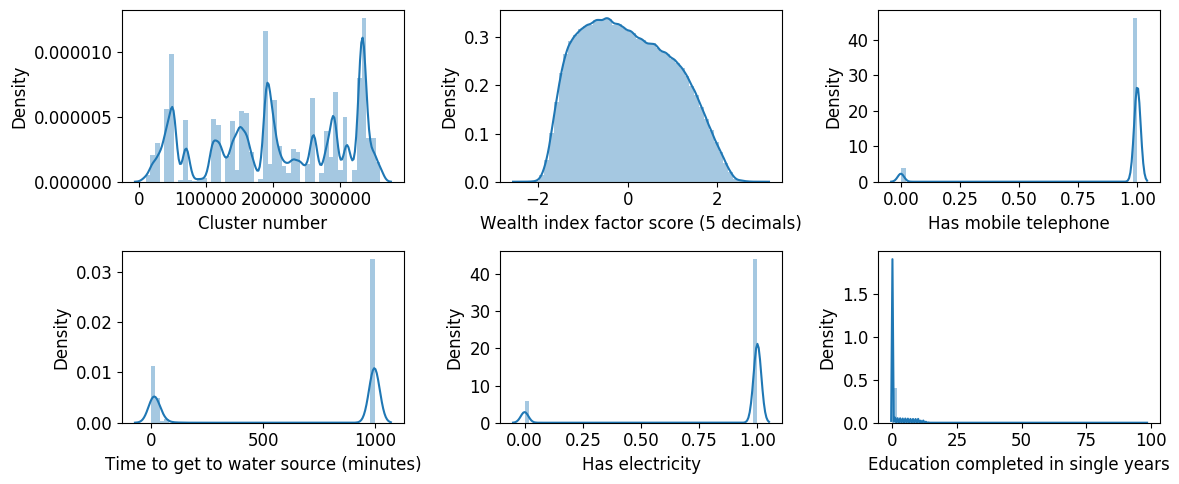

In [23]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(2, 3, sharex=False, figsize=(12,5))
sns.distplot(data_dhs[['Cluster number']],ax=ax[0][0])
ax[0][0].set_xlabel('Cluster number')
sns.distplot(data_dhs[['Wealth index factor score (5 decimals)']],ax=ax[0][1])
ax[0][1].set_xlabel('Wealth index factor score (5 decimals)')
sns.distplot(data_dhs[['Has mobile telephone']],ax=ax[0][2])
ax[0][2].set_xlabel('Has mobile telephone')
sns.distplot(data_dhs[['Time to get to water source (minutes)']],ax=ax[1][0])
ax[1][0].set_xlabel('Time to get to water source (minutes)')
sns.distplot(data_dhs[['Has electricity']],ax=ax[1][1])
ax[1][1].set_xlabel('Has electricity')
sns.distplot(data_dhs[['Education in single years - current school year']],ax=ax[1][2])
ax[1][2].set_xlabel('Education completed in single years')
plt.tight_layout()

In [24]:
data_dhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869043 entries, 0 to 2869042
Data columns (total 6 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   Cluster number                                   int32  
 1   Time to get to water source (minutes)            int16  
 2   Has electricity                                  int8   
 3   Has mobile telephone                             int8   
 4   Wealth index factor score (5 decimals)           float64
 5   Education in single years - current school year  int8   
dtypes: float64(1), int16(1), int32(1), int8(3)
memory usage: 68.4 MB


In [25]:
data_dhs_clean = data_dhs.copy()
data_dhs_clean = data_dhs[data_dhs['Has electricity'] !=9]
data_dhs_clean = data_dhs[data_dhs['Has mobile telephone'] !=9]
data_dhs_clean = data_dhs[data_dhs['Time to get to water source (minutes)'] <=900]
data_dhs_clean.dropna(inplace=True)

In [26]:
data_dhs_clean.describe()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Wealth index factor score (5 decimals),Education in single years - current school year
count,1.004674e+06,1.004674e+06,1.004674e+06,1.004674e+06,1.004674e+06,1.004674e+06
mean,2.112767e+05,1.768056e+01,8.425629e-01,8.680049e-01,-5.104579e-01,1.356861e+00
std,9.534806e+04,2.012612e+01,3.642126e-01,3.384856e-01,8.038055e-01,3.099319e+00
min,1.000700e+04,0.000000e+00,0.000000e+00,0.000000e+00,-2.403230e+00,0.000000e+00
25%,1.504670e+05,1.000000e+01,1.000000e+00,1.000000e+00,-1.148920e+00,0.000000e+00
50%,2.005710e+05,1.300000e+01,1.000000e+00,1.000000e+00,-6.316100e-01,0.000000e+00
75%,2.912740e+05,2.000000e+01,1.000000e+00,1.000000e+00,1.159000e-02,0.000000e+00
max,3.604820e+05,9.000000e+02,1.000000e+00,1.000000e+00,2.806030e+00,9.800000e+01


In [27]:
data_dhs_cluster_1 = data_dhs_clean[[
    'Cluster number',
    'Time to get to water source (minutes)',
    'Has electricity',
     'Has mobile telephone',
    'Education in single years - current school year']].groupby(['Cluster number']).sum().reset_index()

In [28]:
data_dhs_cluster_2 = data_dhs_clean[[
    'Cluster number',
    'Wealth index factor score (5 decimals)']].groupby('Cluster number').median().reset_index()

In [29]:
data_dhs_cluster = data_dhs_cluster_1.merge(data_dhs_cluster_2, left_on='Cluster number', right_on='Cluster number')

In [30]:
data_dhs_cluster.head()

,Cluster number,Time to get to water source (minutes),Has electricity,Has mobile telephone,Education in single years - current school year,Wealth index factor score (5 decimals)
0,10007,99,10.0,7.0,14.0,-0.48754
1,10010,15,1.0,0.0,0.0,0.67804
2,10011,54,9.0,9.0,30.0,0.99810
3,10017,119,22.0,22.0,54.0,0.31462
4,10023,50,5.0,5.0,0.0,-0.61225


In [31]:
data_dhs_cluster.columns = [
    'Cluster',
    'Access to water',
    'Access to electricity',
    'Acess to cellphone',
    'Education completed',
    'Wealth Index Factor Score']

In [32]:
data_dhs_cluster.describe()

,Cluster,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score
count,23160.000000,23160.000000,23160.000000,23160.000000,23160.000000,23160.000000
mean,209131.123921,766.977375,36.550130,37.653800,58.860233,-0.386001
std,101475.371360,897.151878,29.898248,28.486551,51.954457,0.772809
min,10007.000000,0.000000,0.000000,0.000000,0.000000,-2.247620
25%,140370.500000,140.000000,10.000000,12.000000,16.000000,-0.986225
50%,200862.500000,465.000000,30.000000,32.000000,46.000000,-0.488655
75%,310377.250000,1105.000000,59.000000,59.000000,90.000000,0.106883
max,360482.000000,15645.000000,159.000000,162.000000,331.000000,2.806030


In [33]:
dhs_hiv = pd.read_stata('/Users/rohitsharma/Desktop/poverty/IAAR72DT/IAAR72FL.DTA', convert_categoricals=False)


In [34]:
df_hiv = dhs_hiv[['hivclust', 'hiv03']]
df_hiv.columns= ['Cluster', 'hiv blood test result']

In [35]:
df_hiv_cluster = df_hiv.groupby('Cluster').sum().reset_index()

In [36]:
path='/Users/rohitsharma/Downloads'
cluster_file = path+'/IAGE71FL/gpa.csv'  # GPS dataset
df_location = pd.read_csv(cluster_file)[['DHSCLUST', 'LATNUM', 'LONGNUM']]


In [37]:
df_location.columns =['Cluster', 'latitude', 'longitude']
df_location.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28526 entries, 0 to 28525
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cluster    28526 non-null  int64  
 1   latitude   28526 non-null  float64
 2   longitude  28526 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 668.7 KB


In [38]:
df_cluster = data_dhs_cluster.merge(df_hiv_cluster, how='inner', left_on='Cluster',right_on='Cluster' )
df_cluster = df_cluster.merge(df_location, how='inner', left_on='Cluster',right_on='Cluster')

In [42]:
df_cluster.head()


,Cluster,Access to water,Access to electricity,Acess to cellphone,Education completed,Wealth Index Factor Score,hiv blood test result,latitude,longitude
0,10007,99,10.0,7.0,14.0,-0.48754,0,7.016968,93.893226
1,10033,110,11.0,9.0,15.0,-0.40171,0,13.250365,93.005105
2,10040,15,3.0,3.0,11.0,-0.06029,0,12.494193,92.858438
3,10067,400,29.0,12.0,56.0,-0.90324,0,12.880364,92.898026
4,10077,515,26.0,27.0,85.0,-0.69925,0,0.000000,0.000000


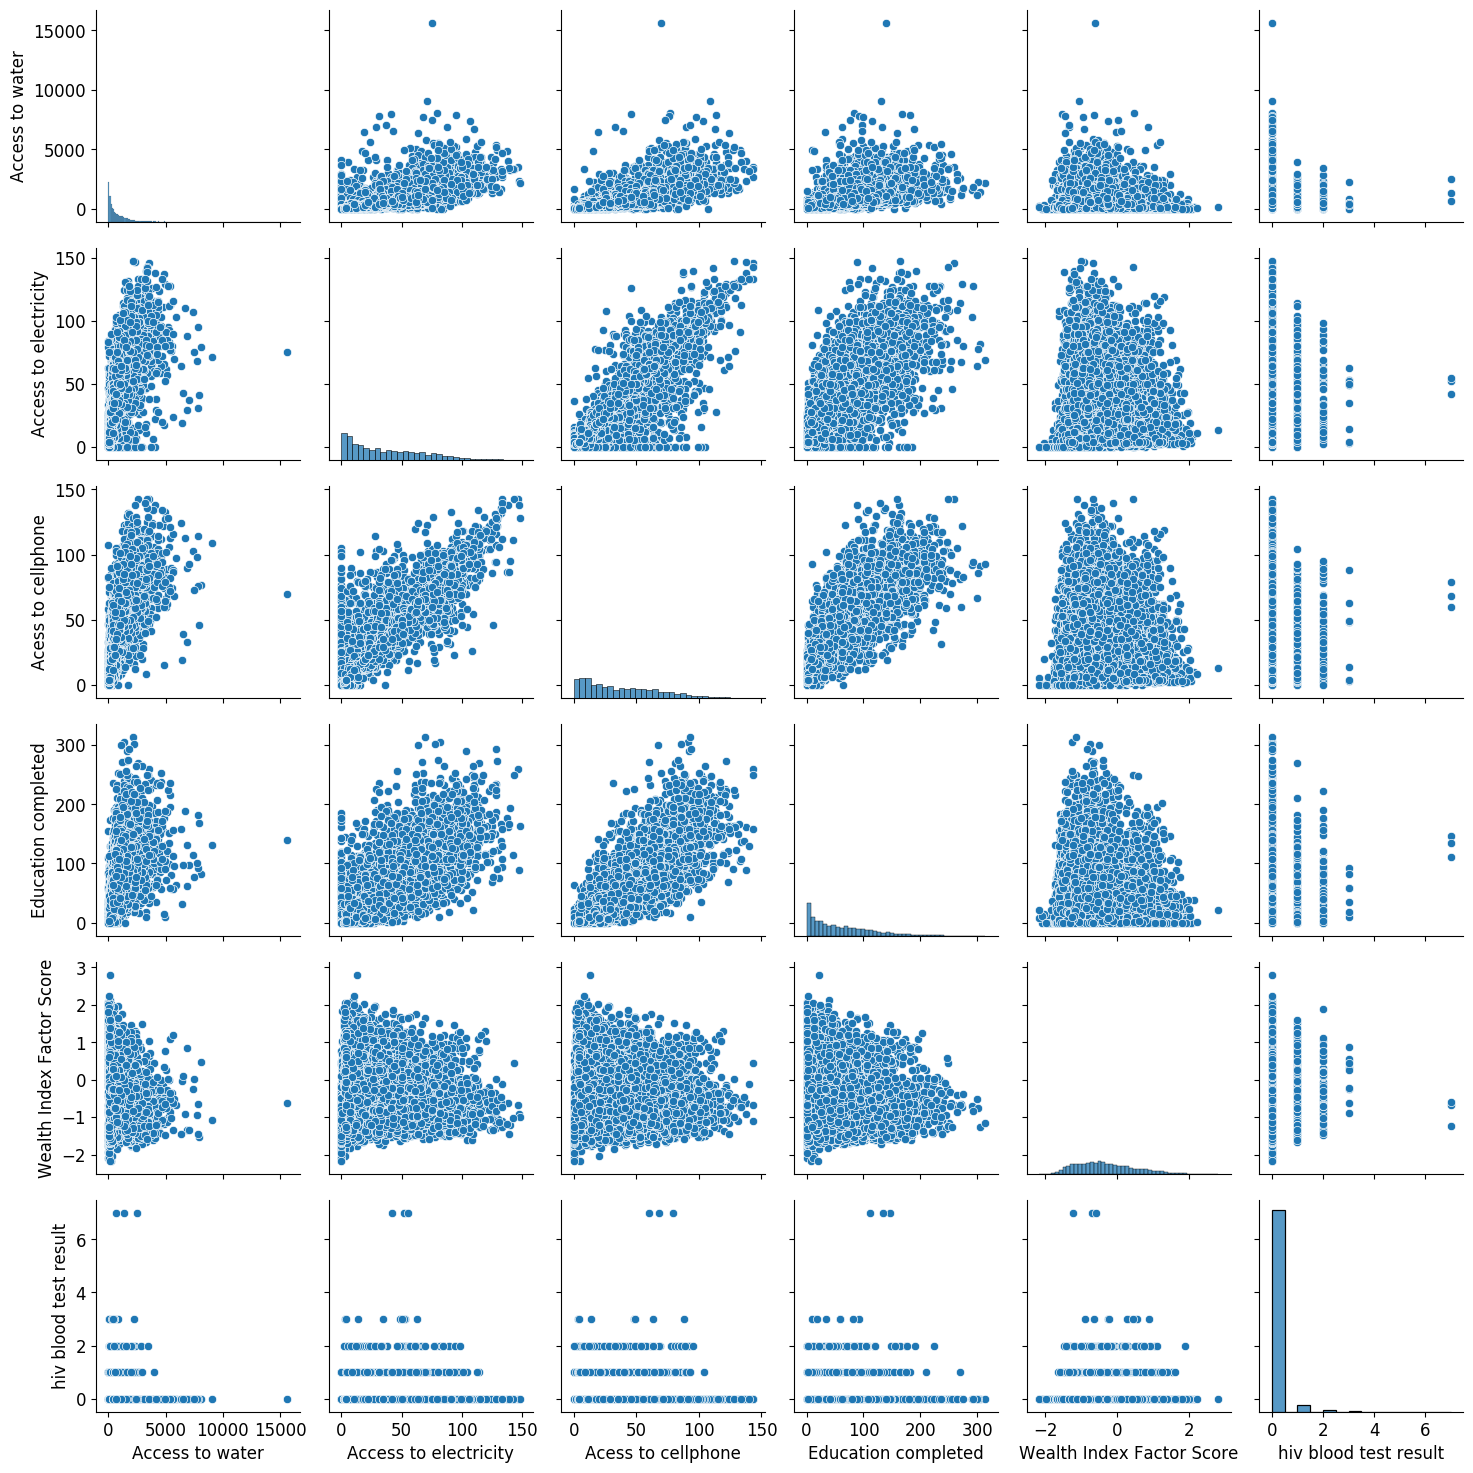

In [43]:
sns.pairplot(df_cluster.iloc[:,1:7])

In [46]:
df_cluster.to_csv( path+'/IAGE71FL/data.csv', index=False)